# 《图像处理与模式识别》实验指导书 (Python-Opencv版)

# ## 目录
### 实验一   图像色彩、代数、几何变换  1学时
### 实验二   图像增强   1学时
### 实验三   图像分割与描述  1学时
### 实验四   图像综合处理小设计实验  2学时
### 实验五   九宫格人车识别   1学时
### 实验六   手写数字或服饰识别 2学时

## 实验环境配置

### 一、Anaconda安装

### 二、虚拟环境配置

## 实验一  图像色彩、代数、几何变换

### 一、实验意义及目的

### 二、实验内容
打开一幅彩色图像Image1，对其进行下列变换：

### 三、相关函数介绍

### 四、参考代码

In [2]:
#部分代码需要根据实际情况更改
#红绿通道互换 
import cv2

image = cv2.imread('E:\\pictures\\peppers.jpg')
#image = cv2.imread('1.jpg')
image1 = image.copy()
image[:,:,1] = image1[:,:,2]
image[:,:,2] = image1[:,:,1]
cv2.namedWindow('changed picture',cv2.WINDOW_NORMAL)
cv2.imshow('changed picture',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#灰度化 
import cv2

image = cv2.imread('E:\\pictures\\peppers.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.namedWindow('rgb to gray', cv2.WINDOW_NORMAL)
cv2.imshow('rgb to gray',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
#图像旋转 
import cv2

image = cv2.imread('E:\\pictures\\peppers.jpg',0)
imageInformation = image.shape
height = imageInformation[0]
width = imageInformation[1]
M = cv2.getRotationMatrix2D((height*0.5,width*0.5),15,0.8)
# 这里有三个参数 分别是中心位置，旋转角度，缩放程度
dst = cv2.warpAffine(image,M,(height,width),cv2.INTER_NEAREST)
cv2.namedWindow('rotate',cv2.WINDOW_NORMAL)
cv2.imshow("rotate",dst)
cv2.waitKey(0)


-1

In [39]:
#图像缩放（缩放到原来的2.5倍）
import cv2

image = cv2.imread('E:\\pictures\\peppers.jpg',0)
imageInformation = image.shape
height = imageInformation[0]
width = imageInformation[1]
image1 = cv2.resize(image,(int(height*2.5),int(width*2.5)))
cv2.namedWindow('result',cv2.WINDOW_NORMAL)
cv2.imshow("result",image1)
cv2.waitKey(0)

-1

In [ ]:
#最近邻插值法缩放（缩放到原来的3倍）
import cv2

image = cv2.imread('E:\\pictures\\peppers.jpg',0)
imageInformation = image.shape
height = imageInformation[0]
width = imageInformation[1]
image1 = cv2.resize(image,(0,0),fx=3,fy=3,interpolation = cv2.INTER_NEAREST)
cv2.namedWindow('result',cv2.WINDOW_NORMAL)
cv2.imshow("result",image1)
cv2.waitKey(0)


In [40]:
#图像镜像与拼接 
import cv2

image = cv2.imread('E:\\pictures\\lotus.bmp')
flip_horizontal = cv2.flip(image , 1)
flip_vertical = cv2.flip(image , 0)
flip_hv = cv2.flip(image , -1)
image1 = cv2.hconcat([image , flip_horizontal])
image2 = cv2.hconcat([flip_vertical , flip_hv])
image3 = cv2.vconcat([image1 , image2])
cv2.namedWindow('result',cv2.WINDOW_NORMAL)
cv2.imshow('result',image3)
cv2.waitKey(0)
cv2.destroyAllWindows()

部分程序运行结果如下：

![](./1.jpg)

![](./2.jpg)

![](./3.jpg)

![](./4.jpg)

### 五、实验要求

### 六、实验考核

### 七、实验报告

## 实验二  图像增强

### 一、实验意义及目的

### 二、实验内容
打开一幅彩色图像Image1，使用图像处理函数，对其进行下列变换：

### 三、相关函数介绍

### 四、参考代码

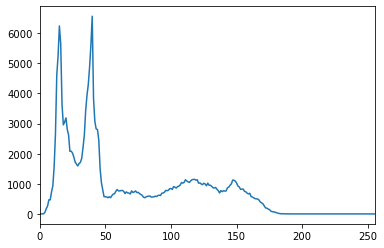

In [4]:
#灰度直方图
import cv2
from matplotlib import pyplot as plt
import numpy as np


image = cv2.imread('E:\\pictures\\lotus.bmp',0)
hist = cv2.calcHist([image], [0], None, [256], [0, 255])
plt.plot(hist)
plt.xlim([0, 255])
plt.show()

In [7]:
#分段线性变换
import cv2
import numpy as np

image = cv2.imread('E:\\pictures\\lotus.bmp',0)
h,w = image.shape[:2]
out = np.zeros(image.shape, np.uint8)
for i in range(h):
    for j in range(w):
        pix = image[i][j]
        if pix < 10:
            out[i][j] = 0
        elif pix < 180:
            out[i][j] = pix
        else:
            out[i][j] = 255

cv2.namedWindow('result', 0)
cv2.imshow('result' , out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#直方图均衡化
import cv2

image = cv2.imread('E:\\pictures\\lotus.bmp',0)
equalizedimage = cv2.equalizeHist(image)
cv2.namedWindow('equalizedimage', cv2.WINDOW_NORMAL)
cv2.imshow('equalizedimage', equalizedimage)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
#伪彩色增强
import cv2

image = cv2.imread('E:\\pictures\\lotus.bmp',0)
color_image = cv2.applyColorMap(image, cv2.COLORMAP_JET)
cv2.imshow("color_image", color_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [9]:
#椒盐噪声3*3中值滤波
import cv2
import numpy as np
import random

#椒盐噪声
def sp_noise(image,prob):
    thres = 1 - prob
    output = np.zeros(image.shape, np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()#生成0-1之间的随机值
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 1
            else:
                output[i][j] = image[i][j]
    return output

image = cv2.imread('E:\\pictures\\lotus.bmp',0)
image1 = sp_noise(image, 0.04)
image2 = cv2.medianBlur(image1, 3)
image3 = cv2.hconcat([image, image1])
cv2.namedWindow('result', cv2.WINDOW_NORMAL)
cv2.imshow('result', image3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#高斯滤波
import cv2
import numpy as np
import random

def gaussian_noise(image,mean,var):
    image = np.array(image/255,dtype=float)
    noise = np.random.normal(mean,var**0.5,image.shape)
    out = image+noise
    if out.min() < 0:
        low_clip = -1
    else:
        low_clip = 0
    out = np.clip(out,low_clip,1.0)
    out = np.uint8(out * 255)
    return  out

image = cv2.imread('E:\\pictures\\lotus.bmp',0)
out1 = gaussian_noise(image,0,0.01)
gaussianblurimage = cv2.GaussianBlur(out1, (3,3) , 3,3)
final = cv2.hconcat([gaussianblurimage,out1])
cv2.namedWindow('result', cv2.WINDOW_NORMAL)
cv2.imshow('result', final)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
#Sobel梯度图像
import cv2

image = cv2.imread('E:\\pictures\\lotus.bmp',0)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, 3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, 3)
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
sobel_xy = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)
cv2.namedWindow('result', cv2.WINDOW_NORMAL)
cv2.imshow('result', sobel_xy)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [15]:
#Sobel锐化图像
import cv2

image = cv2.imread('E:\\pictures\\lotus.bmp',0)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, 3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, 3)
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
sobel_xy = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)
result = image+sobel_xy
cv2.namedWindow('result', cv2.WINDOW_NORMAL)
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

程序的运行效果如下：

![](./5.jpg)

![](./6.jpg)

![](./7.jpg)

![](./8.jpg)

![](./9.jpg)

### 五、实验要求

### 六、实验考核

### 七、实验报告

## 实验三 图像分割与描述

### 一、实验意义及目的 

### 二、实验内容

打开一幅图像Image，使用图像处理函数，对其进行下列变换： 

### 三、相关函数介绍

### 四、参考代码

In [6]:
#二值化图像
import cv2

image = cv2.imread('E:\\pictures\\plane.jpg', 0)
ret,BWimage = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.namedWindow('result', cv2.WINDOW_NORMAL)
cv2.imshow('result', BWimage)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#形态学滤波
import cv2

image = cv2.imread('E:\\pictures\\plane.jpg', 0)
ret, BWimage = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
LBimage1 = cv2.morphologyEx(BWimage, cv2.MORPH_OPEN, kernel)
LBimage2 = cv2.morphologyEx(BWimage, cv2.MORPH_CLOSE, kernel)
LBimage3 = cv2.morphologyEx(BWimage, cv2.MORPH_GRADIENT, kernel)
LBimage4 = cv2.morphologyEx(BWimage, cv2.MORPH_TOPHAT, kernel)
LBimage5 = cv2.morphologyEx(BWimage, cv2.MORPH_BLACKHAT, kernel)
A = cv2.hconcat([LBimage1, LBimage2, LBimage3 ])
B = cv2.hconcat([LBimage4, LBimage5,  BWimage])
C =cv2.vconcat([A, B])
cv2.namedWindow('result', cv2.WINDOW_NORMAL)
cv2.imshow('result', C)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
#绘制轮廓
import cv2

image = cv2.imread('E:\\pictures\\plane.jpg')
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, BWimage = cv2.threshold(image1, 127, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(BWimage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image, contours, -1, (0, 0, 255), 1)
cv2.namedWindow('result',  cv2.WINDOW_NORMAL)
cv2.imshow('result', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
#重建的图像
import cv2
import numpy as np

gray = cv2.imread('E:\\pictures\\plane.jpg',0)
image = cv2.imread('E:\\pictures\\plane.jpg')
ret, BWimage = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(BWimage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  
contour_array = contours[0]
contours_complex = np.empty(contour_array.shape[:-1], dtype=complex)
contours_complex.real = contour_array[:,:,0]
contours_complex.imag = contour_array[:,:,1]

for i in range(1,len(contours_complex.real),4):
    contours_complex.real[i,0] = contour_array[i,:,0]

for j in range(1,len(contours_complex.imag),4):
    contours_complex.imag[j,0] = contour_array[j,:,1]

fourier_result = np.fft.fft(contours_complex)
contour_reconstruct = np.fft.ifft(fourier_result)
contour_reconstruct = np.array([contour_reconstruct.real,contour_reconstruct.imag])
contour_reconstruct = np.transpose(contour_reconstruct)
contour_reconstruct = np.expand_dims(contour_reconstruct, axis = 1)
cv2.drawContours(image,contour_reconstruct.astype(int),-1, (0, 0, 255), 1)
cv2.namedWindow("contour_reconstruct",0)
cv2.imshow("contour_reconstruct", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

程序运行结果如下：

![](./10.jpg)

![](./11.jpg)

![](./12.jpg)

### 五、实验要求

### 六、实验考核

### 七、实验报告

## 实验四 图像综合处理小设计实验 

### 一、实验意义及目的

充分利用所学各种图像处理技术，实现对图像的综合处理，加深对基础知识的理解和应用。 

### 二、实验内容

![](./13.jpg)

 ![](./14.jpg)

 ![](./15.jpg)

 ![](./16.jpg)

### 三、实验要求

### 四、实验考核

### 五、实验报告

## 实验五 九宫格人车识别

### 一、实验意义及目的

### 二、实验内容

 ![](./17.png)

### 三、实验要求

### 四、实验考核

### 五、实验报告

## 实验六 手写数字或服饰识别

### 一、实验意义及目的

### 二、实验内容

![MNIST](./MNIST.png)

![FashionMNIST](./FashionMNIST.png)

### 三、实验要求

### 四、参考代码

In [1]:
#导入相关库
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np
import os
import torch.nn.functional as F
import torch.optim as optim

In [2]:
#参数定义
#dataset = "FashionMNIST" #选择所使用的数据集"MNIST"or"FashionMNIST"
dataset = "MNIST"
#Net = "LeNet5" #选择所使用的网络"LeNet5"or "LinearNet"
Net = "LinearNet" #选择所使用的网络"LeNet5"or "LinearNet"
batch_size = 64 #定义批处理大小
lr=0.01 #设置learning rate学习率
epochs = 5 #指定训练迭代次数
save_path = "./" #模型保存路径
Early_Stopping = 0 #选择是否使用Early Stopping训练模式，训练时根据精度的变化率来控制训练迭代代数

In [3]:
#下载数据集
if dataset=="MNIST":
    # 从torchvision下载训练集.
    training_data = datasets.MNIST(
        root="data",
        train=True,
        download=True,
        transform=ToTensor(),
    )

    # #从torchvision下载测试集.
    test_data = datasets.MNIST(
        root="data",
        train=False,
        download=True,
        transform=ToTensor(),
    )
    classes = [ "0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
else:
    # 从torchvision下载训练集.
    training_data = datasets.FashionMNIST(
        root="data",
        train=True,
        download=True,
        transform=ToTensor(),
    )

    # #从torchvision下载测试集.
    test_data = datasets.FashionMNIST(
        root="data",
        train=False,
        download=True,
        transform=ToTensor(),
    )
    classes = [ "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal","Shirt", "Sneaker", "Bag", "Ankle boot"]

D:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


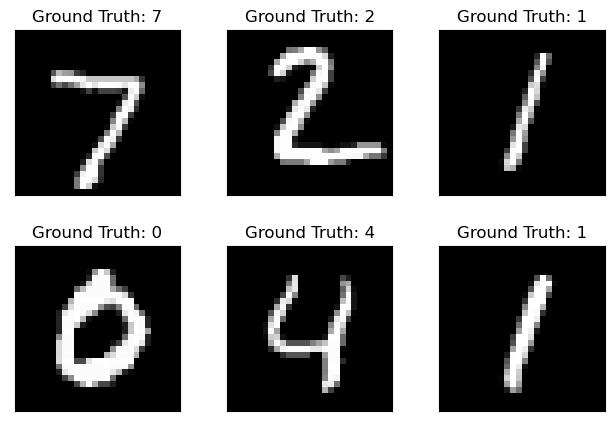

In [4]:
# 创建数据加载器.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

#观察数据样本
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    fig = plt.figure()
    for i in range(6):
      plt.subplot(2,3,i+1)
      plt.tight_layout()
      plt.imshow(X[i][0], cmap='gray', interpolation='none')
      plt.title("Ground Truth: {}".format(classes[int(y[i])]))
      plt.xticks([])
      plt.yticks([])
    plt.show()
    break

In [5]:
# 自动选择cpu或gpu用于训练.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [6]:
#定义模型

if Net == "LinearNet":
    class LinearNet(nn.Module):
        def __init__(self):
            super().__init__()
            self.flatten = nn.Flatten()
            self.linear_relu_stack = nn.Sequential(
                nn.Linear(28*28, 512),
                nn.ReLU(),
                nn.Linear(512, 512),
                nn.ReLU(),
                nn.Linear(512, 10)
            )

        def forward(self, x):
            x = self.flatten(x)
            logits = self.linear_relu_stack(x)
            return logits

    model = LinearNet().to(device)
    
else:
    class CNN_1(nn.Module):
        def __init__(self):
            super(CNN_1, self).__init__()
                nn.Conv2d(
                ## 卷积核大小为羽3，输入通道为__，输出通道为13，步长为1;
                ## paddingHzero padding
                ##要求经过conv1的输出空间维度与输入的空间维度相同
                in_channels =       ,
                out_channels =          ,
                kernels_size =           ,
                stride=                 ,
                padding=            ,
            )
            ##激活函数+最大池化
            ,
            ,
            
            self.conv2d = nn.Sequential(
            ## 1. 卷积核大小为3*3，输入通道为10，输出通道为10，padding 方法为same，padding大小为？？？步长为??
            ## 2.自行选择激活函数
            ## 3. 池化




            )
            ## 添加残差连接模块
            #############残差模块设计部分################




            ############################################
            self.conv3 = nn.Sequential(
                ##自行设计卷积模块


            )
            self.out1 = nn.Linear(3*3*29, 10, bias = True)
            ## 在下方添加Dropout以及其他代码
            

        def forward(self, x):
            ## 请将余下代码补充完整


    model = CNN_1().to(device)


print(model)

LinearNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


![LeNet-5](./LeNet-5.jpg)

In [7]:
#为了训练模型，我们需要一个损失函数和一个优化器
loss_fn = nn.CrossEntropyLoss()#定义损失函数
optimizer = torch.optim.???????(model.parameters(), ????????)#定义优化器

#在单个训练循环中，模型对训练数据集进行预测（分批提供给它），并反向传播预测误差以调整模型的参数
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

#对照测试数据集检查模型的性能，以确保它正在学习
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss
    
#实现Early Stopping训练
class EarlyStopping:
    def __init__(self, save_path, patience=2, verbose=False, delta=0.03):
        """
        Args:
            save_path : 模型保存路径
            patience (int): 设置将连续几次训练迭代纳入Early Stopping考评
            verbose (bool): 如果是 "True"，则为每次验证损失的优化值打印一条信息
            delta (float): 前后两次训练迭代的最小变化阈值，小于该阈值则认为模型优化幅度有限，将该次迭代计入patience，
                           数量达到patience则提前停止训练。
        """
        self.save_path = save_path
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''当验证损失降低时，保存模型'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        path = os.path.join(self.save_path, 'best_network.pth')
        torch.save(model.state_dict(), path)	# 这里会存储迄今最优模型的参数
        self.val_loss_min = val_loss


    
#训练过程是在所定义的几个迭代上进行的。在每次迭代，模型学习参数以做出更好的预测。我们在每次迭代打印模型的准确性和损失；我们希望看到精度随着迭代次数的增加而增加，而损失随着迭代次数的减少而减少
early_stopping = EarlyStopping(save_path)
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test_loss = test(test_dataloader, model, loss_fn)
    if Early_Stopping:
        early_stopping(test_loss, model)
        if early_stopping.early_stop:
            print("Early stopping")
            break #跳出迭代，结束训练
print("Done!")

Epoch 1
-------------------------------
loss: 2.310157  [   64/60000]
loss: 2.255705  [ 6464/60000]
loss: 2.219243  [12864/60000]
loss: 2.015800  [19264/60000]
loss: 1.852811  [25664/60000]
loss: 1.544494  [32064/60000]
loss: 1.164786  [38464/60000]
loss: 1.102608  [44864/60000]
loss: 0.855882  [51264/60000]
loss: 0.716411  [57664/60000]
Test Error: 
 Accuracy: 83.3%, Avg loss: 0.661168 

Epoch 2
-------------------------------
loss: 0.739424  [   64/60000]
loss: 0.552977  [ 6464/60000]
loss: 0.556154  [12864/60000]
loss: 0.530490  [19264/60000]
loss: 0.468894  [25664/60000]
loss: 0.451964  [32064/60000]
loss: 0.342593  [38464/60000]
loss: 0.503526  [44864/60000]
loss: 0.463082  [51264/60000]
loss: 0.470099  [57664/60000]
Test Error: 
 Accuracy: 88.9%, Avg loss: 0.391432 

Epoch 3
-------------------------------
loss: 0.417350  [   64/60000]
loss: 0.315711  [ 6464/60000]
loss: 0.325021  [12864/60000]
loss: 0.406835  [19264/60000]
loss: 0.326629  [25664/60000]
loss: 0.374817  [32064/600

In [8]:
#保存模型的一种常见方法是序列化内部状态字典(包含模型参数)
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [76]:
#加载模型的过程包括重新创建模型结构并将状态字典加载到其中。
model = LinearNet().to(device) if Net == "LinearNet" else LeNet5().to(device)
model.load_state_dict(torch.load("model.pth"))

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')


Predicted: "7", Actual: "7"


## 五、实验考核

# #六、实验报告